<a href="https://colab.research.google.com/github/zi-onion/24-2-ESAA/blob/main/11_11_Keras_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 딥러닝 텐서플로 ch3. 4, 6~7 p.87-95, 105-115

## 4. 모델 세부 설정

In [1]:
from keras.datasets import mnist
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data() 로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() #max: 255
x_test = x_test / x_test.max() #max:255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
train set:  (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


### 4-1 초기값 설정
- 레이어의 초기화 방법을 다르게도 설정 可.
  - dense 레이어는 기본 초기화 방법으로 glorot uniform 초기화 방법이 설정되어 있음.

In [2]:
dense = tf.keras.layers.Dense(256, activation="relu")
dense.get_config()["kernel_initializer"]

{'module': 'keras.initializers',
 'class_name': 'GlorotUniform',
 'config': {'seed': None},
 'registered_name': None}

- 기본값 설정 glorotuniform을 HeNormal로 변경하자. <~ kernel_initializer 매개변수에 설정.


In [3]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer="he_normal", activation ="relu")
print(dense.get_config()["kernel_initializer"])

# 클래스 인스터스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation="relu")
print(dense.get_config()["kernel_initializer"])

{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}
{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}


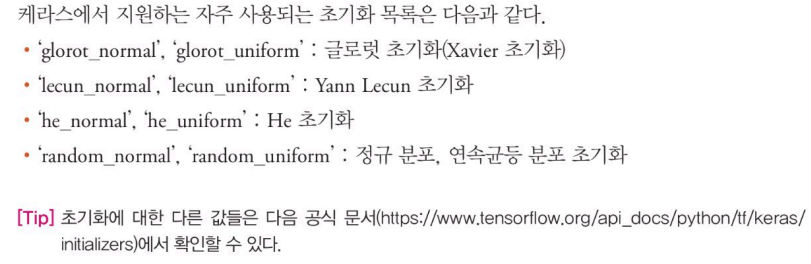

### 4-2 규제 regularization

In [4]:
# 기본값
dense = tf.keras.layers.Dense(256, activation="relu")
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

- 모델이 과대적합하는 것을 방지해주기 위해 모델을 구성하는 레이어마다 규제를 적용할 수 있음.
  - 케라스에서 l1, l2 규제 지원 <~ kernel_regularizer에 규제 지정

In [5]:
# L1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer="l1", activation="relu")
print(dense.get_config()["kernel_regularizer"])

# 클래스 인스턴스 적용. alpha=0.1 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation="relu")
print(dense.get_config()["kernel_regularizer"])

{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.009999999776482582}, 'registered_name': None}
{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.10000000149011612}, 'registered_name': None}


### 4-3 드롭아웃 dropout
- "Droupout: A Simple Way to Prevent Neural Networks from Overfitting' 논문에서 제안된 아이디어.
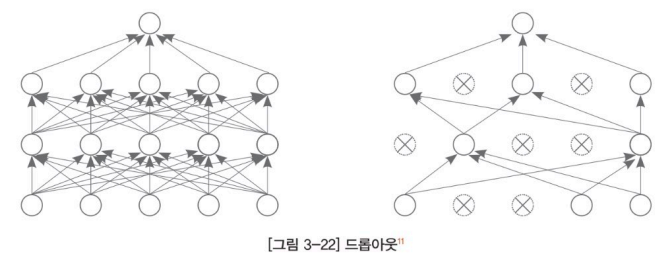

- 딥러닝 모델의 층이 넓고 깊어질 때, 훈련에 주어진 샘플에 과하게 적합 학습하는 경향이 있음. -> 훈련할 때 만나지 못한 새로운 데이터에 대해 좋지 않은 예측력. => 드롭아웃: 모델의 과대적합 문제 해결.
- 노드 中 확률적으로 몇 개의 신호를 끊으면 모델이 쉽게 과대적합 되는 것을 방지 可.
∵모델이 학습하는 가중치 파라미터의 개수가 현저히 ↓.


In [6]:
# Dropout 25% 비율 적용 (25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

<Dropout name=dropout, built=False>

### 4-4 배치 정규화 Batch Normalization
- 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화. 다음 층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에 보다 안정적인 훈련이 가능하고 성능을 크게 향상 가능.
- 배치 정규화 층은 케라스에서 클래스 함수로 지원하기 때문에 별도로 코드 구현할 必要 없. 클래스 인스턴스를 생성하여 추가.

In [7]:
# Model A: Dense+ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model_a.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Model B: Dense+BatchNorm+ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation("relu"),

    tf.keras.layers.Dense(32),
     # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation("relu"),

    tf.keras.layers.Dense(10,activation="softmax")

])

model_b.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,034 (207.16 KB)

 Trainable params: 52,842 (206.41 KB)

 Non-trainable params: 192 (768.00 B)

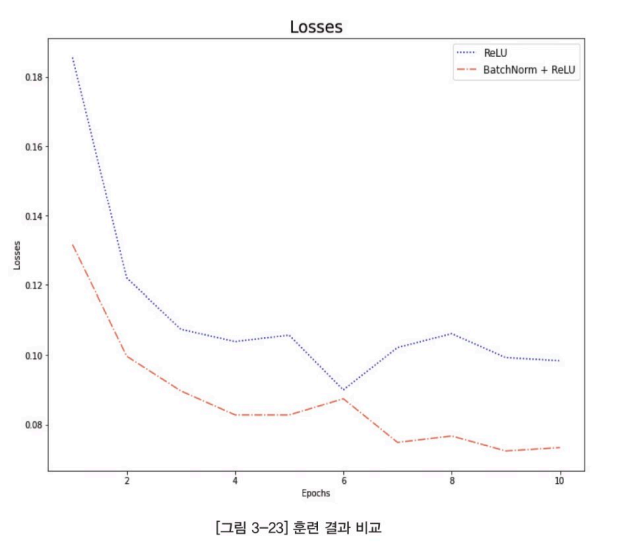

- 배치 정규화만 추가해도 손실이 이전 대비 더 안정적이고 빠르게 수렴함.
- 복잡한 데이터셋일수록 배치 정규화 유무가 모델 성능에 큰 영향.

### 4-5 활성화 activation 함수

In [9]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


<LeakyReLU name=leaky_re_lu_1, built=False>

In [10]:
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
     # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10,activation="softmax"),

])

model_c.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,034 (207.16 KB)

 Trainable params: 52,842 (206.41 KB)

 Non-trainable params: 192 (768.00 B)

In [11]:
model_a.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_b.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_c.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Model A: Dense+ ReLU
history_a = model_a.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10)

# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10)

# Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8376 - loss: 0.5443 - val_accuracy: 0.9552 - val_loss: 0.1511
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9594 - loss: 0.1398 - val_accuracy: 0.9686 - val_loss: 0.1048
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9709 - loss: 0.0961 - val_accuracy: 0.9670 - val_loss: 0.1066
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9766 - loss: 0.0773 - val_accuracy: 0.9727 - val_loss: 0.0861
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9812 - loss: 0.0610 - val_accuracy: 0.9730 - val_loss: 0.0857
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9837 - loss: 0.0515 - val_accuracy: 0.9712 - val_loss: 0.0938
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9859 - loss: 0.0455 - val_accuracy: 0.9755 - val_loss: 0.0818
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9888 - loss: 0.0352 

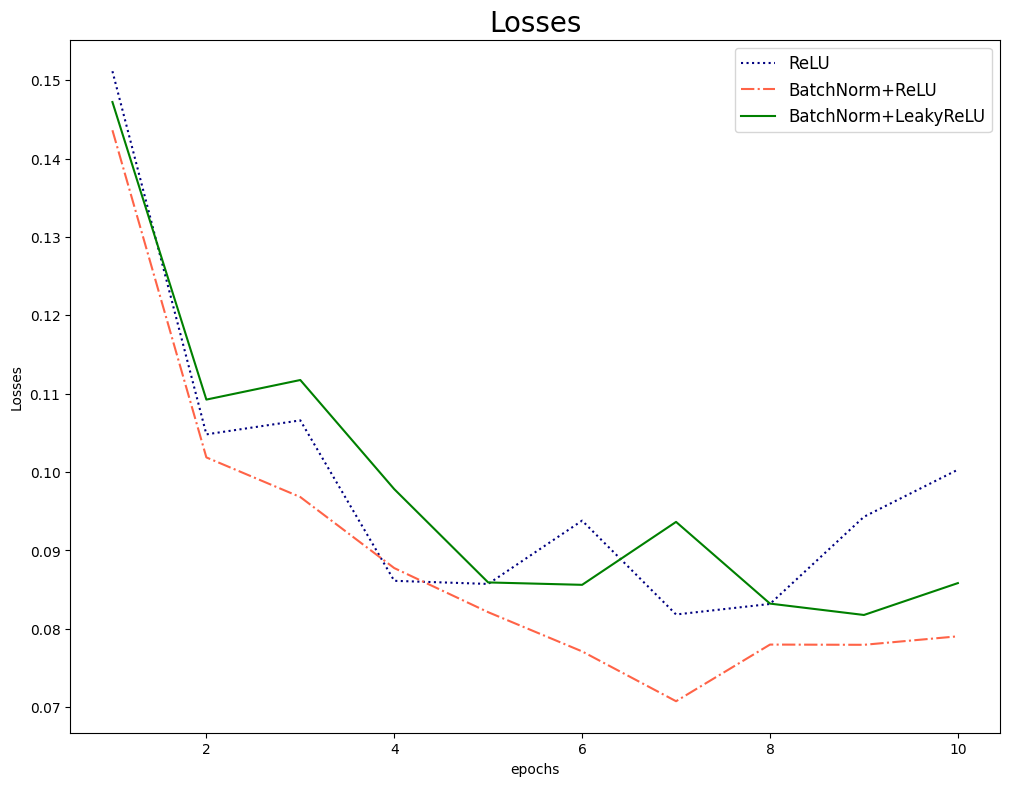

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11), history_a.history["val_loss"],color="navy",linestyle=":")
plt.plot(np.arange(1,11), history_b.history["val_loss"],color="tomato",linestyle="-.")
plt.plot(np.arange(1,11), history_c.history["val_loss"],color="green",linestyle="-")

plt.title("Losses",fontsize=20)
plt.xlabel("epochs")
plt.ylabel("Losses")
plt.legend(["ReLU","BatchNorm+ReLU","BatchNorm+LeakyReLU"],fontsize=12)
plt.show()

## 6. 모델 저장 및 불러오기

### 6-1 모델을 파일로 저장
- 훈련을 종료하여 가중치가 업데이트된 모델 인스턴스 저장 可.
  - HDF5 포맷
  - SavedModel 포

In [13]:
# 모델 c를 h5 포맷으로 저장
model_c.save("h5-model.h5")

### 6-2 저장된 모델 복원

In [14]:
h5_model = tf.keras.models.load_model("h5-model.h5")
h5_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,036 (207.18 KB)

 Trainable params: 52,842 (206.41 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 2 (12.00 B)

In [15]:
# 모델 검증
loss,acc = h5_model.evaluate(x_test,y_test,verbose=0)
print(f"h5model] loss:{loss:.5f}.acc:{acc:.5f}")

h5model] loss:0.08583.acc:0.97660


In [18]:
# 모델 C를 SavedModel 포맷으로 저장
model_c.save("saved-model.keras")

In [19]:
# 모델 복원
saved_model = tf.keras.models.load_model("saved-model.keras")
saved_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,878 (413.59 KB)

 Trainable params: 52,842 (206.41 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 52,844 (206.43 KB)

In [20]:
# 모델 검증 - HDF5 포맷
loss,acc = h5_model.evaluate(x_test,y_test,verbose=0)
print(f"h5model] loss:{loss:.5f}.acc:{acc:.5f}")

# 모델 검증 - SavedModel 포맷
loss,acc = saved_model.evaluate(x_test,y_test,verbose=0)
print(f"saved_model] loss:{loss:.5f}.acc:{acc:.5f}")

h5model] loss:0.08583.acc:0.97660
saved_model] loss:0.08583.acc:0.97660


## 7. 복잡한 모델 생성

### 7-1 함수형 API Functional API
- 함수 형태로 딥러닝 모델을 정의하면 다양한 모델 구조 구현 可.
- 여러 층을 시퀀스 형태로 연결하는 Sequential API와 다르게, Functional API는 복잡한 구조의 모델을 정의 可.
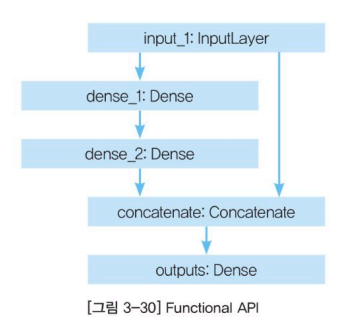

함수형 API를 사용하기 위해서는 먼저 input 레이어 정의. ~> input 레이어에 데이터의 입력 shape 정의 ~> 레이어마다 반환되는 출력 값을 변수에 저장한 뒤 다음 레이어의 입력으로 연결. ~> 이런 식으로 여러 개의 레이어를 마치 체인 구조로 입출력을 계속 연결 可.

In [21]:
# 모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer = tf.keras.Input(shape=(28,28), name="InputLayer")

# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name="Flatten")(input_layer)
x2 = tf.keras.layers.Dense(256,activation="relu",name="Dense1")(x1)
x3 = tf.keras.layers.Dense(64,activation="relu",name="Dense2")(x2)
x4 = tf.keras.layers.Dense(10,activation="softmax",name="OutputLayer")(x3)

In [22]:
# 모델 생성
# input 매개변수로 입력층인 input_layer 지정. output 매개변수에 출력층 지정. name 매개변수에 이름 지정.
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name="FunctionalModel")

# 모델 요약
func_model.summary()

Model: "FunctionalModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)              │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

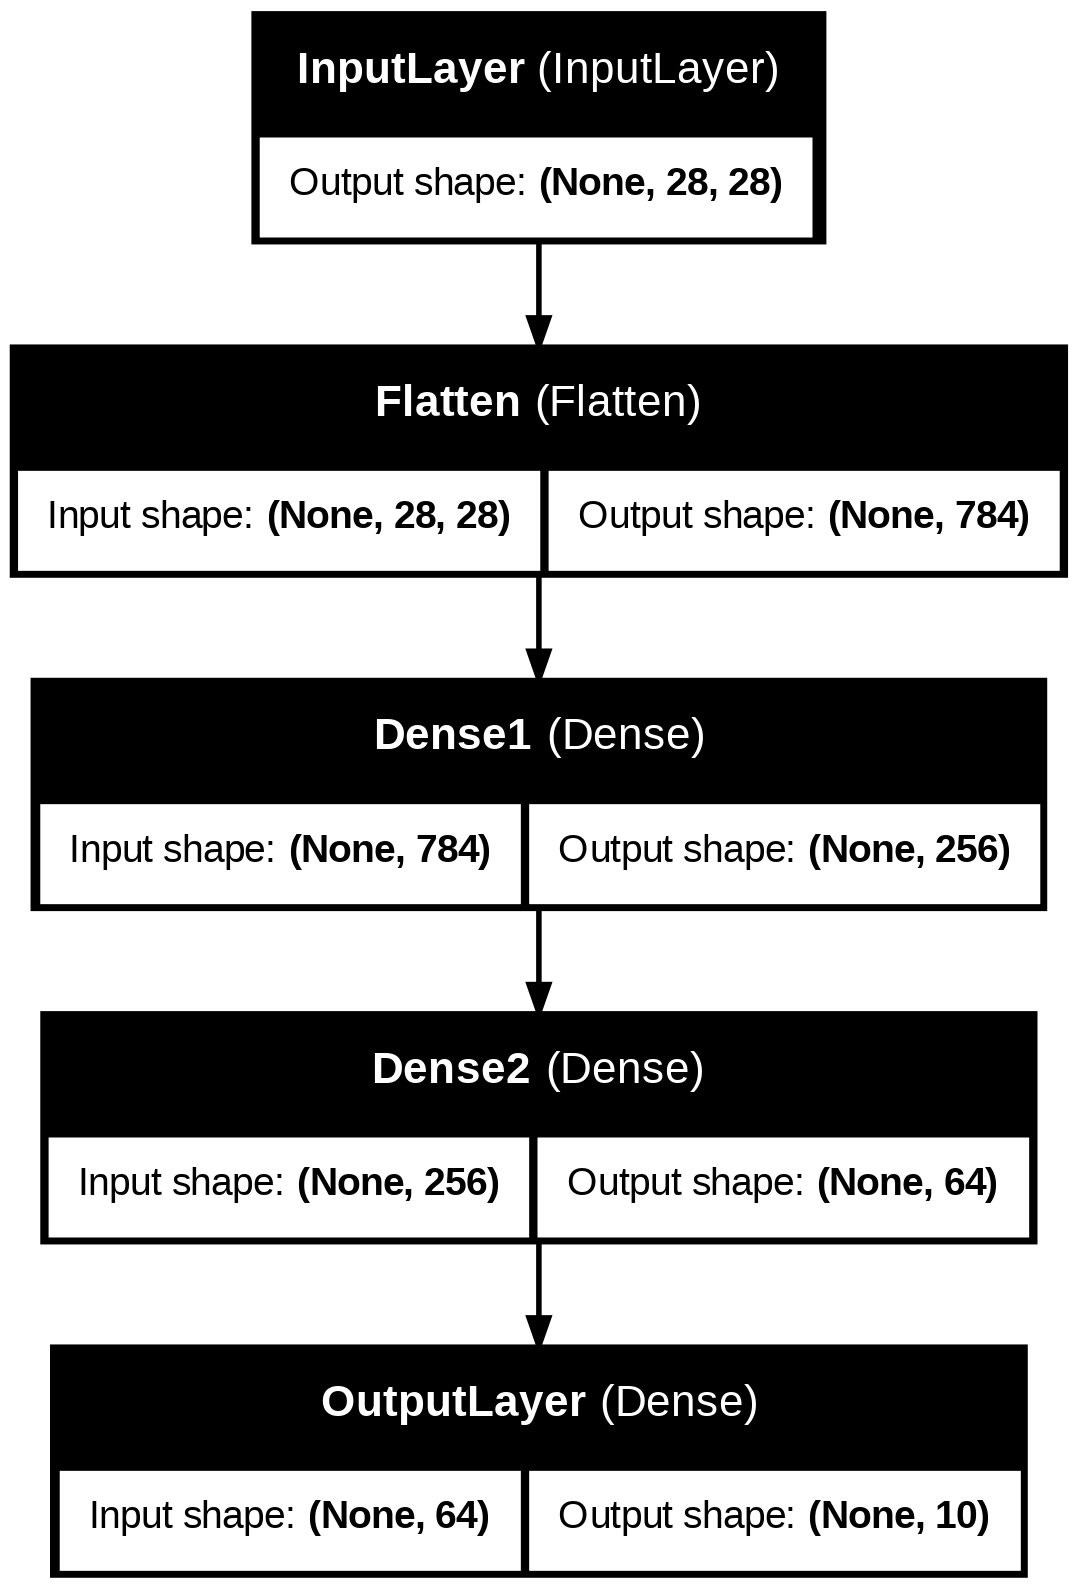

In [23]:
# 복잡한 구조를 갖는 모델을 생성할 때는 summary()보다 plot_model 모듈을 활용하여 모델의 구조 시각화
from tensorflow.keras.utils import plot_model

plot_model(func_model, show_shapes=True, show_layer_names=True, to_file="model.png")

In [24]:
func_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

func_model.fit(x_train,y_train, epochs=3)

loss, acc = func_model.evaluate(x_test,y_test,verbose=0)
print(f"func_model] loss:{loss:.5f}.acc:{acc:.5f}")

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8866 - loss: 0.3775
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9738 - loss: 0.0847
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9833 - loss: 0.0559
func_model] loss:0.07154.acc:0.97810


### 7-2 모델 서브클래싱 Model Subclassing
- 텐서플로 케라스는 Model 클래스를 제공하고, 이를 기반으로 딥러닝 모델을 구현하고 있음. 이 클래스를 직접 상속받아 사용자가 직접 서브클래스로 딥러닝 모델 만들 수 있음.
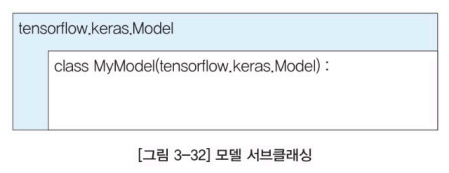

In [25]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel,self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256,activation="relu")
        self.dense2 = tf.keras.layers.Dense(64,activation="relu")
        self.dense3 = tf.keras.layers.Dense(10,activation="softmax")

    # method overiding
    # 훈련용 함수 정의
    # x는 input
    ''' call() 함수를 메소드 오버라이딩으로 구현.
    call() 메소드 fit() 메소드가 호출되어 훈련하는 경우 호출될 함수.
    call() 함수 내부에서는 모델의 입력부터 출력까지의 흐름, 즉 순전파 정의하고 함수형 API와 같은 방식으로
    모든 레이어를 체인처럼 연결. 마지막으로 최종 출력 값을 return '''
    def call(self,x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [26]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = "subclass_model"

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# 컴파일
mymodel.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# 훈련
mymodel.fit(x_train,y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test,y_test,verbose=0)
print(f"Subclassing Model]loss:{loss:.5f}.acc:{acc:.5f}")
''' Model Subclassing으로 생성된 모델의 훈련도 동일하게 compile()메소드로 컴파일 후
fit() 메소드로 훈련. ; 함수형 API로 생성한 모델과 Model Subclassing으로 생성한 모델 모두 동일한
compile()메소드와 fit() 메소드로 훈련 可.
evaluate() 메소드로 모델 성능 검증 可'''

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8937 - loss: 0.3653
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9717 - loss: 0.0911
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9819 - loss: 0.0581
Subclassing Model]loss:0.07850.acc:0.97690


' Model Subclassing으로 생성된 모델의 훈련도 동일하게 compile()메소드로 컴파일 후\nfit() 메소드로 훈련. ; 함수형 API로 생성한 모델과 Model Subclassing으로 생성한 모델 모두 동일한\ncompile()메소드와 fit() 메소드로 훈련 可.\nevaluate() 메소드로 모델 성능 검증 可'

### 7-3 서브클래싱 모델 파라미터를 활용한 생성


In [32]:
# 모델의 생성자 파라미터를 추가하여 동적으로 레리어의 유닛 개수 초기화 예제
class MyModel(tf.keras.Model):

    # 생성자 파라미터 추가
    def __init__(self, units, num_classes):
        super(MyModel,self).__init__()
        #초기값 설정
        # unit의 개수를 입력받아 Dense 레이어의 유닛 개수를 계산하여 설정.
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units,activation="relu")
        self.dense2 = tf.keras.layers.Dense(int(units / 4),activation="relu")
        self.dense3 = tf.keras.layers.Dense(num_classes,activation="softmax")

    # class overiding
    # 훈련용 함수 정의
    # x는 input
    def call(self,x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [33]:
# 모델 생성
mymodel = MyModel(256,10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()
## 동적으로 설정한 레이어의 파라미터가 초기화됐음을 확인 가능.

Model: "my_model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# 컴파일
mymodel.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# 훈련
mymodel.fit(x_train,y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test,y_test,verbose=0)
print(f"Subclassing Model w.parameters]loss:{loss:.5f}.acc:{acc:.5f}")

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8868 - loss: 0.3785
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9706 - loss: 0.0935
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9823 - loss: 0.0547
Subclassing Model w.parameters]loss:0.08430.acc:0.97270
